In [2]:
import pandas as pd

In [3]:
# Read data
df = pd.read_csv('hotel_reviews (1).csv')

In [4]:
# Display information about the DataFrame
print("DataFrame Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6996 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB
DataFrame Info:
 None


In [5]:
df.describe()

,Index,Rating(Out of 10)
count,7001.00000,7001.000000
mean,3500.00000,7.030981
std,2021.15895,2.882846
min,0.00000,1.000000
25%,1750.00000,6.000000
50%,3500.00000,8.000000
75%,5250.00000,9.000000
max,7000.00000,10.000000


In [6]:
# Drop rows with NaN values in Review_Text
df = df.dropna(subset=['Review_Text'])

In [7]:

def clean_text(text):
    if isinstance(text, float) and np.isnan(text):
        return ''
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ''.join([i for i in text if not i.isdigit()])  # Remove numbers
    return text

In [8]:
import string
 # Importing the string module for string manipulation tasks (e.g., removing punctuation)
import numpy as np
 # Importing NumPy for numerical computations and efficient array operations
import nltk
 # Importing NLTK (Natural Language Toolkit) for natural language processing tasks
from nltk.tokenize import word_tokenize
 # Importing word_tokenize for tokenizing text into words
from nltk.corpus import stopwords
 # Importing stopwords for filtering out common words in text analysis


In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Apply text cleaning
df['Cleaned_Review_Text'] = df['Review_Text'].apply(clean_text)

# Tokenization
df['Tokens'] = df['Cleaned_Review_Text'].apply(word_tokenize)

# Stop Words Removal
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['Tokens'].apply(lambda x: [word for word in x])


In [11]:

# Before cleaning
print("Before Text Cleaning:")
print(df['Review_Text'])

# Apply text cleaning
df['Cleaned_Review_Text'] = df['Review_Text'].apply(clean_text)
print("After Text Cleaning:")
print(df['Cleaned_Review_Text'])


Before Text Cleaning:
0       Hotel the pearl is perfect place to stay in De...
1       Location of the hotel is perfect. The hotel is...
2                                  Location, Indian food.
3       The location and the hotel itself is great. Ne...
4       Friendly and smiling staffs.. The reception st...
                              ...                        
6996    The room was good, comfortable and aesthetic \...
6997                                           good hotel
6998    good experience for me about hotel \nvery good...
6999                                            well done
7000                                              Nothing
Name: Review_Text, Length: 6996, dtype: object
After Text Cleaning:
0       hotel the pearl is perfect place to stay in de...
1       location of the hotel is perfect the hotel is ...
2                                    location indian food
3       the location and the hotel itself is great nex...
4       friendly and smiling staffs the 

In [12]:
# Before tokenization
print("\nAfter Text Cleaning (before tokenization):")
print(df['Cleaned_Review_Text'])

# Tokenization
print("After tokenization")
df['Tokens'] = df['Cleaned_Review_Text'].apply(word_tokenize)
print(df['Tokens'])



After Text Cleaning (before tokenization):
0       hotel the pearl is perfect place to stay in de...
1       location of the hotel is perfect the hotel is ...
2                                    location indian food
3       the location and the hotel itself is great nex...
4       friendly and smiling staffs the reception staf...
                              ...                        
6996    the room was good comfortable and aesthetic \n...
6997                                           good hotel
6998    good experience for me about hotel \nvery good...
6999                                            well done
7000                                              nothing
Name: Cleaned_Review_Text, Length: 6996, dtype: object
After tokenization
0       [hotel, the, pearl, is, perfect, place, to, st...
1       [location, of, the, hotel, is, perfect, the, h...
2                                [location, indian, food]
3       [the, location, and, the, hotel, itself, is, g...
4       [fri

In [13]:
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['Tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
print("\nAfter Stop Words Removal:")
print(df['Tokens'])


After Stop Words Removal:
0       [hotel, pearl, perfect, place, stay, delhi, pa...
1       [location, hotel, perfect, hotel, peaceful, ni...
2                                [location, indian, food]
3       [location, hotel, great, next, time, stay, nic...
4       [friendly, smiling, staffs, reception, staff, ...
                              ...                        
6996    [room, good, comfortable, aesthetic, hotel, go...
6997                                        [good, hotel]
6998    [good, experience, hotel, good, staff, well, d...
6999                                         [well, done]
7000                                            [nothing]
Name: Tokens, Length: 6996, dtype: object


In [14]:
print("Before Stop Words Removal:")
for tokens in df['Tokens'].head():
    print(tokens)

Before Stop Words Removal:
['hotel', 'pearl', 'perfect', 'place', 'stay', 'delhi', 'paharganj', 'whole', 'staff', 'helpful', 'informative', 'rooms', 'clean', 'comfortable', 'hotels', 'location', 'convenient', 'truly', 'wonderful', 'stay', 'recommended']
['location', 'hotel', 'perfect', 'hotel', 'peaceful', 'nice', 'staff', 'kind', 'nice', 'rooms', 'recommend', 'hotel']
['location', 'indian', 'food']
['location', 'hotel', 'great', 'next', 'time', 'stay', 'nice', 'rooms', 'comfortable', 'beds', 'good', 'attitude', 'staff', 'helpful', 'explain', 'everything', 'ask']
['friendly', 'smiling', 'staffs', 'reception', 'staff', 'excellent', 'ready', 'help', 'time', 'location', 'fantastic', 'near', 'attractions', 'room', 'big', 'comfortable']


In [15]:
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['Tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
print("\nAfter Stop Words Removal:")
for tokens in df['Tokens'].head():
    print(tokens)


After Stop Words Removal:
['hotel', 'pearl', 'perfect', 'place', 'stay', 'delhi', 'paharganj', 'whole', 'staff', 'helpful', 'informative', 'rooms', 'clean', 'comfortable', 'hotels', 'location', 'convenient', 'truly', 'wonderful', 'stay', 'recommended']
['location', 'hotel', 'perfect', 'hotel', 'peaceful', 'nice', 'staff', 'kind', 'nice', 'rooms', 'recommend', 'hotel']
['location', 'indian', 'food']
['location', 'hotel', 'great', 'next', 'time', 'stay', 'nice', 'rooms', 'comfortable', 'beds', 'good', 'attitude', 'staff', 'helpful', 'explain', 'everything', 'ask']
['friendly', 'smiling', 'staffs', 'reception', 'staff', 'excellent', 'ready', 'help', 'time', 'location', 'fantastic', 'near', 'attractions', 'room', 'big', 'comfortable']


In [16]:
from nltk.stem import WordNetLemmatizer

In [17]:
lemmatizer = WordNetLemmatizer()
df['Tokens'] = df['Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(df[['Review_Text', 'Cleaned_Review_Text', 'Tokens']].head())

                                         Review_Text  \
0  Hotel the pearl is perfect place to stay in De...   
1  Location of the hotel is perfect. The hotel is...   
2                             Location, Indian food.   
3  The location and the hotel itself is great. Ne...   
4  Friendly and smiling staffs.. The reception st...   

                                 Cleaned_Review_Text  \
0  hotel the pearl is perfect place to stay in de...   
1  location of the hotel is perfect the hotel is ...   
2                               location indian food   
3  the location and the hotel itself is great nex...   
4  friendly and smiling staffs the reception staf...   

                                              Tokens  
0  [hotel, pearl, perfect, place, stay, delhi, pa...  
1  [location, hotel, perfect, hotel, peaceful, ni...  
2                           [location, indian, food]  
3  [location, hotel, great, next, time, stay, nic...  
4  [friendly, smiling, staff, reception, staff, e..

In [18]:
!pip install wordcloud

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [20]:
df['Cleaned_Review_Text'] = df['Review_Text'].astype(str).str.lower().str.replace('[^\w\s]', '', regex=True)
def sentiment_label(rating):
    if rating >= 7:
        return 'positive'
    elif rating <= 3:
        return 'negative'
    else:
        return 'neutral'

In [21]:
print(df['Rating(Out of 10)'])

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
6996    10.0
6997     9.0
6998    10.0
6999    10.0
7000     2.0
Name: Rating(Out of 10), Length: 6996, dtype: float64


In [22]:
df['Rating(Out of 10)'] = pd.to_numeric(df['Rating(Out of 10)'], errors='coerce')
print(df['Rating(Out of 10)'])

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
6996    10.0
6997     9.0
6998    10.0
6999    10.0
7000     2.0
Name: Rating(Out of 10), Length: 6996, dtype: float64


In [23]:
df['Sentiment'] = df['Rating(Out of 10)'].apply(sentiment_label)
print(df['Sentiment'])

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
6996    positive
6997    positive
6998    positive
6999    positive
7000    negative
Name: Sentiment, Length: 6996, dtype: object


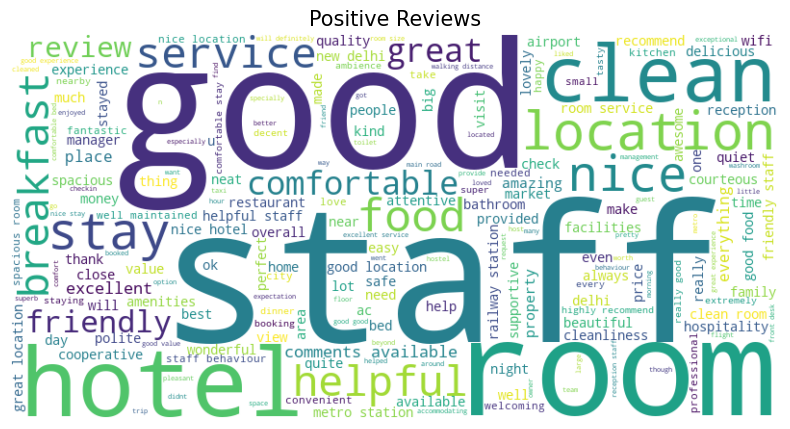

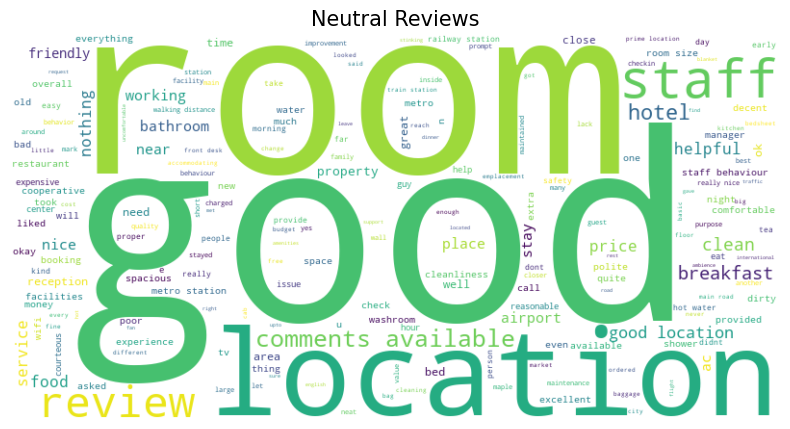

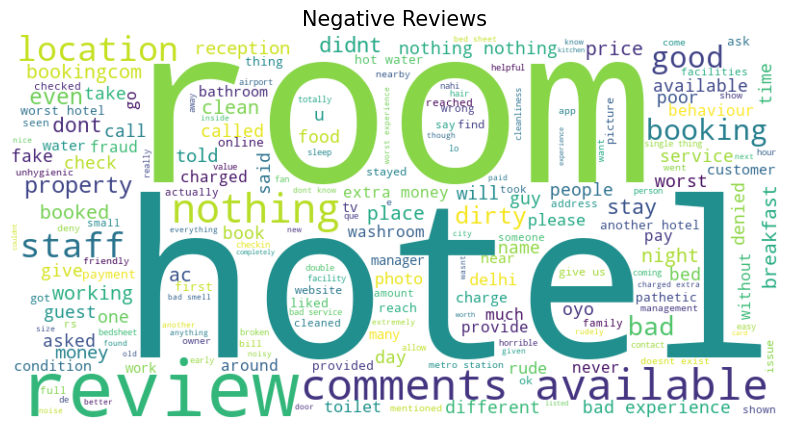

In [24]:
def generate_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=15)
    plt.axis('off')
    plt.show()
positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['Cleaned_Review_Text'])
neutral_reviews = ' '.join(df[df['Sentiment'] == 'neutral']['Cleaned_Review_Text'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['Cleaned_Review_Text'])
generate_wordcloud(positive_reviews, title='Positive Reviews')
generate_wordcloud(neutral_reviews, title='Neutral Reviews')
generate_wordcloud(negative_reviews, title='Negative Reviews')


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()
df['Sentiment_Encoded'] = label_encoder.fit_transform(df['Sentiment'])

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Review_Text'], df['Sentiment_Encoded'], test_size=0.2, random_state=42)
print(f"Training set - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Testing set - X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Training set - X_train shape: (5596,), y_train shape: (5596,)
Testing set - X_test shape: (1400,), y_test shape: (1400,)
